<a href="https://colab.research.google.com/github/reemnawaf90/REEMNAWAF/blob/main/another_copy_of_finalproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


heart disease


## Description of the database

### Source of Data
https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci

### Dataset Overview
- **Features (Columns)**:
  1. **Age**: Age of the patient (numerical).
  2. **Sex**: Gender of the patient (categorical: 1 = male, 0 = female).
  3. **CP**: Chest pain type (categorical: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
  4. **Trestbps**: Resting blood pressure (mm Hg) upon admission to the hospital (numerical).
  5. **Chol**: Serum cholesterol level (mg/dl) (numerical).
  6. **Fbs**: Fasting blood sugar > 120 mg/dl (categorical: 1 = true, 0 = false).
  7. **Restecg**: Resting electrocardiographic results (categorical: 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
  8. **Thalach**: Maximum heart rate achieved (numerical).
  9. **Exang**: Exercise induced angina (categorical: 1 = yes, 0 = no).
  10. **Oldpeak**: ST depression induced by exercise relative to rest (numerical).
  11. **Slope**: The slope of the peak exercise ST segment (categorical: 1 = upsloping, 2 = flat, 3 = downsloping).
  12. **CA**: Number of major vessels (0-3) colored by fluoroscopy (numerical).
  13. **Thal**: Thalassemia (categorical: 3 = normal, 6 = fixed defect, 7 = reversible defect).
  
  **Target Variable**:
  - **Target**: Presence of heart disease (categorical: 0 = no, 1 = yes).

### Features (Columns) Explanation
- **Age**: Numeric value representing the age of the patient.
- **Sex**: Categorical variable where 1 denotes male and 0 denotes female.
- **CP**: Categorical variable indicating the type of chest pain.
- **Trestbps**: Numeric value of resting blood pressure in mm Hg.
- **Chol**: Numeric value of serum cholesterol level in mg/dl.
- **Fbs**: Categorical variable indicating fasting blood sugar level (>120 mg/dl as 1, otherwise 0).
- **Restecg**: Categorical variable describing resting electrocardiographic results.
- **Thalach**: Numeric value indicating maximum heart rate achieved.
- **Exang**: Categorical variable indicating exercise induced angina.
- **Oldpeak**: Numeric value indicating ST depression induced by exercise relative to rest.
- **Slope**: Categorical variable indicating the slope of the peak exercise ST segment.
- **CA**: Numeric value indicating the number of major vessels colored by fluoroscopy.
- **Thal**: Categorical variable indicating thalassemia status.
- **Target**: Categorical variable indicating the presence (1) or absence (0) of heart disease.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/heart.csv.xls')

# Display basic information about the dataset
print(df.info())
print('First few rows of the dataset:')
print(df.head())
print('Basic descriptive statistics:')
print(df.describe())

# Check for missing values
print('Missing values:')
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2      

In [ ]:
# Load the Heart into a DataFrame
df = pd.read_csv('/content/heart.csv.xls')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/heart.csv.xls')


<ipython-input-14-b1098e3c489b>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


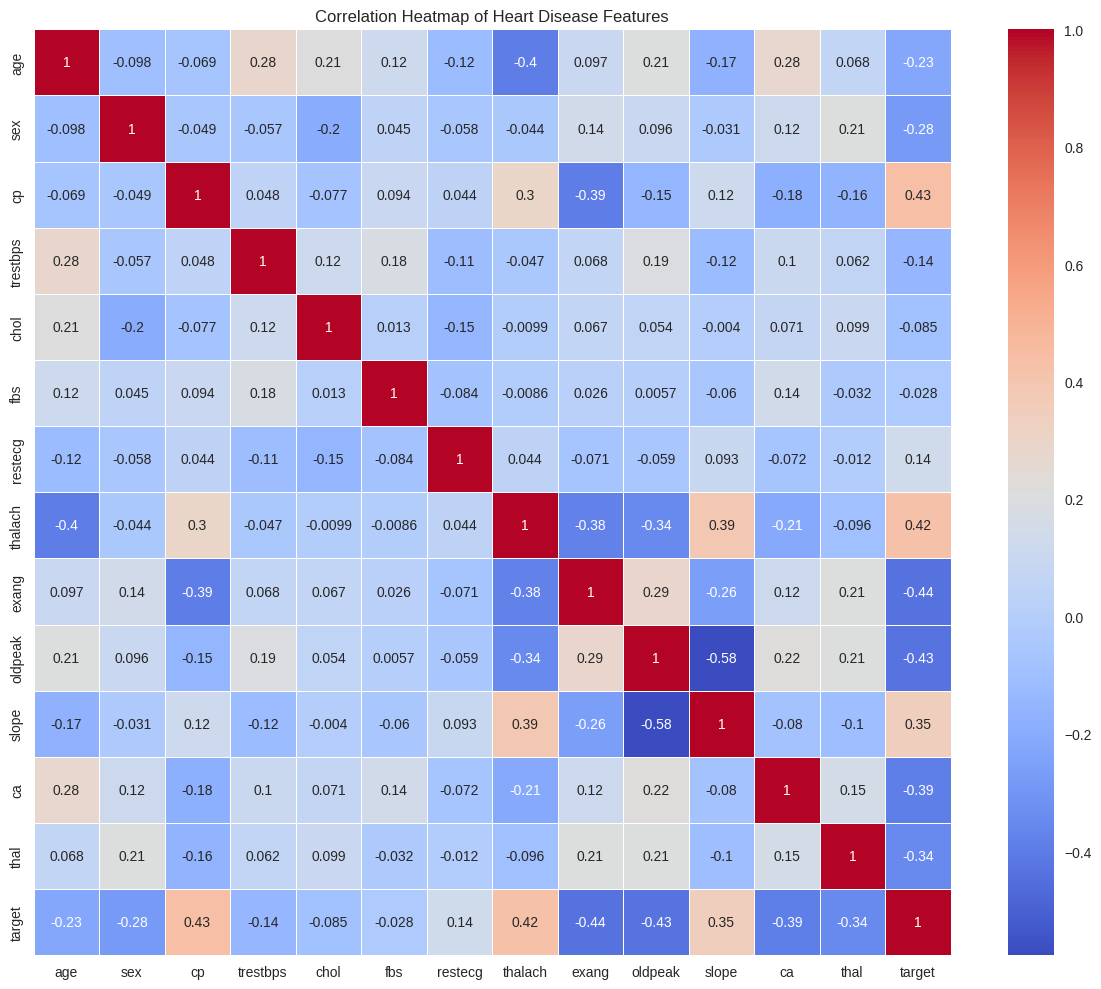

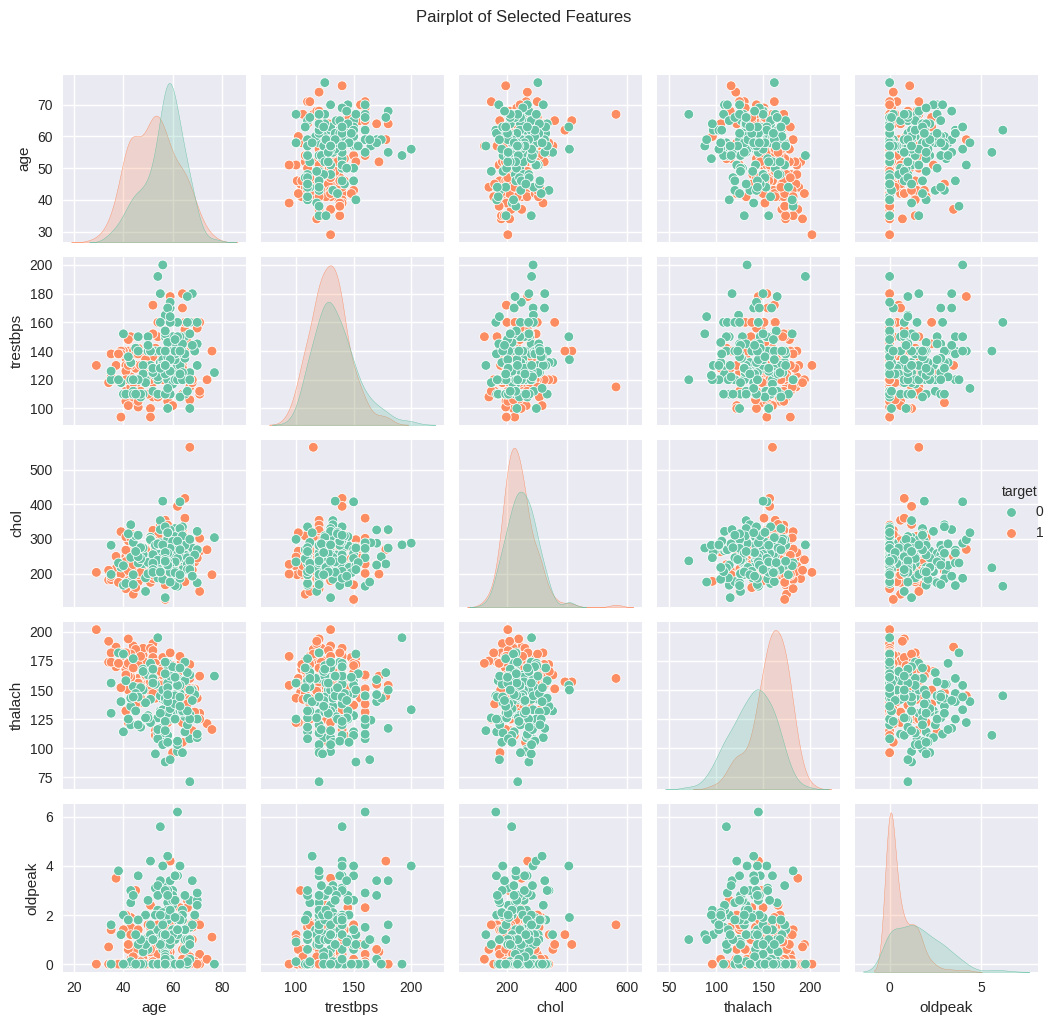

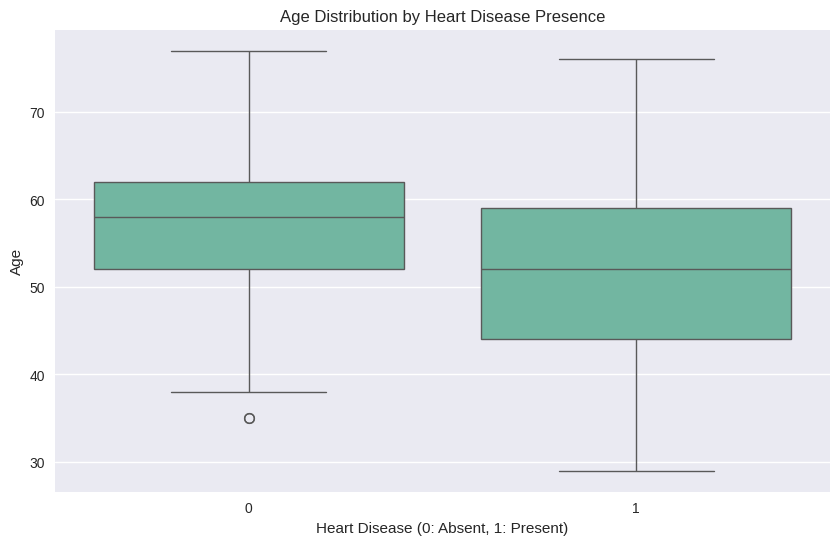

Additional Descriptive Statistics:
              age                       chol                      thalach  \
             mean median min max        mean median  min  max        mean   
target                                                                      
0       56.601449   58.0  35  77  251.086957  249.0  131  409  139.101449   
1       52.496970   52.0  29  76  242.230303  234.0  126  564  158.466667   

                        
       median min  max  
target                  
0       142.0  71  195  
1       161.0  96  202  
Percentage of heart disease cases: 54.46%


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv.xls')

# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette('Set2')

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.show()

# Create a pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[selected_features], hue='target', height=2)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

# Create a boxplot for age distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease (0: Absent, 1: Present)')
plt.ylabel('Age')
plt.show()

# Display additional descriptive statistics
print('Additional Descriptive Statistics:')
print(df.groupby('target').agg({'age': ['mean', 'median', 'min', 'max'],
                                'chol': ['mean', 'median', 'min', 'max'],
                                'thalach': ['mean', 'median', 'min', 'max']}))

# Calculate the percentage of heart disease cases
heart_disease_percentage = (df['target'].sum() / len(df)) * 100
print(f'\
Percentage of heart disease cases: {heart_disease_percentage:.2f}%')